# IMT 573 - Lab 7 - Regression

### Instructions

Before beginning this assignment, please ensure you have access to a working instance of Jupyter Notebooks with Python 3.

1. First, replace the “YOUR NAME HERE” text in the next cell with your own full name. Any collaborators must also be listed in this cell.

2. Be sure to include well-documented (e.g. commented) code cells, figures, and clearly written text  explanations as necessary. Any figures should be clearly labeled and appropriately referenced within the text. Be sure that each visualization adds value to your written explanation; avoid redundancy – you do no need four different visualizations of the same pattern.

3. Collaboration on problem sets and labs is fun, useful, and encouraged. However, each student must turn in an individual write-up in their own words as well as code/work that is their own. Regardless of whether you work with others, what you turn in must be your own work; this includes code and interpretation of results. The names of all collaborators must be listed on each assignment. Do not copy-and-paste from other students’ responses or code - your code should never be on any other student's screen or machine.

4. All materials and resources that you use (with the exception of lecture slides) must be appropriately referenced within your assignment.

Name: Steve Gonzales Collaborators: None 

In this module, we have focused on statistical modeling. In this lab, you'll explore the concept of regression model using the same baseball data as the previous lab. As a refresher, baseball is a bat-and-ball sport played in countries around the world including the United States, Canada, Cuba, the Dominican Republic, and Japan, to name a few. Baseball is a played between two teams who take turns batting and fielding. The objective of the game is to score "runs" by getting on "bases" with either "hits" or "walks". A run is scored when a player advances around the bases and returns to home plate. You can learn more [here](https://en.wikipedia.org/wiki/Baseball).

We will use the same dataset of baseball game statistics from 2010-2013 as the previous lab. You can learn more about the dataset at www.retrosheet.org/.

In [13]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

### Problem 1: Set up data

What is the relationship between the number of at-bats a team gets and the number of runs they score over the course of an entire baseball season? This is the question we will explore in this lab. 

#### (a) Import data

To begin, load the data found in the `GL2010.TXT`, `GL2011.TXT`, `GL2012.TXT`, `GL2013.TXT` into a single dataframe. You can find column names for the data in the `cnames.txt` file. You should ultimately have 9,720 rows of data.

In [3]:
columns = pd.read_csv('cnames.txt')['Name'].tolist()
df = pd.read_csv('GL2010.TXT', header=None)
n = 0
for i, f in enumerate(['GL2011.TXT', 'GL2012.TXT', 'GL2013.TXT']):
    data = pd.read_csv(f, header=None)
    n += len(data)
    print(n, len(data))
    df = pd.concat([df, data])
df.columns = columns

print(len(df))
if len(df) != 9720:
    print("The data does not add up to 9720 rows")
display(df)

2429 2429
4859 2430
7290 2431
9720


,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,152,153,154,155,156,157,158,159,160,161
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,J.D. Drew,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,Howie Kendrick,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,A.J. Pierzynski,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,Yuniesky Betancourt,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,Mark Ellis,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,20130929,0,Sun,DET,AL,162,MIA,NL,162,0,...,Chris Coghlan,5,hillk002,Koyie Hill,2,alvah001,Henderson Alvarez,1,NaN,Y
2427,20130929,0,Sun,MIL,NL,162,NYN,NL,162,2,...,Juan Centeno,2,tovaw001,Wilfredo Tovar,6,niesj001,Jonathon Niese,1,NaN,Y
2428,20130929,0,Sun,SDN,NL,162,SFN,NL,162,6,...,Brandon Crawford,6,perej002,Juan Perez,7,moscg001,Guillermo Moscoso,1,NaN,Y
2429,20130929,0,Sun,CHN,NL,162,SLN,NL,162,0,...,Shane Robinson,7,wongk001,Kolten Wong,4,westj001,Jake Westbrook,1,NaN,Y


#### (b) Pull years

For this exercise, we need data for each team (30 in total) for each season in the dataset (4 seasons). Each season is designated by the year in which the games were played, which can be pulled from the `Date` variable. Start by creating a `Year` variable.

In [6]:
# Inspect the data
data = df.values.tolist()[:3]
columns = df.columns.tolist()
print(f"Columns: {columns}\nData: {data}")

Columns: ['Date', 'Numberofgame', 'Day', 'Visitor', 'VisitorLeague', 'VisitorGameNum', 'Home', 'HomeLeague', 'HomeGameNum', 'VisitorScore', 'HomeScore', 'Outs', 'DayorNight', 'Completion', 'Forfeit', 'Protest', 'ParkID', 'Attendance', 'DurationMinutes', 'VisitingLineScores', 'HomeLineScores', 'Vat-bats', 'Vhits', 'Vdoubles', 'Vtriples', 'Vhomeruns', 'VRBI', 'Vsacrificehits', 'Vsacrificeflies', 'Vhit-by-pitch', 'Vwalks', 'Vintentionalwalks', 'Vstrikeouts', 'Vstolenbases', 'Vcaughtstealing', 'Vgroundedintodoubleplays', 'Vawardedfirstoncatcherinterference', 'Vleftonbase', 'Vpitchersused', 'Vindividualearnedruns', 'Vteam arnedruns', 'Vwildpitches', 'Vbalks', 'Vputouts', 'Vassists', 'Verrors', 'Vpassed balls', 'Vdouble plays', 'Vtriple plays', 'Hat-bats', 'Hhits', 'Hdoubles', 'Htriples', 'Hhomeruns', 'HRBI', 'Hsacrificehits', 'Hsacrificeflies', 'Hhit-by-pitch', 'Hwalks', 'Hintentionalwalks', 'Hstrikeouts', 'Hstolenbases', 'Hcaughtstealing', 'Hgroundedintodoubleplays', 'Hawardedfirstoncatche

In [7]:
# Create a year column
df['year'] = df['Date'].astype(str).str[:4].astype(int)
display(df)

,Date,Numberofgame,Day,Visitor,VisitorLeague,VisitorGameNum,Home,HomeLeague,HomeGameNum,VisitorScore,...,153,154,155,156,157,158,159,160,161,year
0,20100404,0,Sun,NYA,AL,1,BOS,AL,1,7,...,9,camem001,Mike Cameron,8,scutm001,Marco Scutaro,6,NaN,Y,2010
1,20100405,0,Mon,MIN,AL,1,ANA,AL,1,3,...,4,woodb003,Brandon Wood,5,mathj001,Jeff Mathis,2,NaN,Y,2010
2,20100405,0,Mon,CLE,AL,1,CHA,AL,1,0,...,2,teahm001,Mark Teahen,5,ramia003,Alexei Ramirez,6,NaN,Y,2010
3,20100405,0,Mon,DET,AL,1,KCA,AL,1,8,...,6,kendj001,Jason Kendall,2,getzc001,Chris Getz,4,NaN,Y,2010
4,20100405,0,Mon,SEA,AL,1,OAK,AL,1,5,...,4,buckt001,Travis Buck,7,pennc001,Cliff Pennington,6,NaN,Y,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,20130929,0,Sun,DET,AL,162,MIA,NL,162,0,...,5,hillk002,Koyie Hill,2,alvah001,Henderson Alvarez,1,NaN,Y,2013
2427,20130929,0,Sun,MIL,NL,162,NYN,NL,162,2,...,2,tovaw001,Wilfredo Tovar,6,niesj001,Jonathon Niese,1,NaN,Y,2013
2428,20130929,0,Sun,SDN,NL,162,SFN,NL,162,6,...,6,perej002,Juan Perez,7,moscg001,Guillermo Moscoso,1,NaN,Y,2013
2429,20130929,0,Sun,CHN,NL,162,SLN,NL,162,0,...,7,wongk001,Kolten Wong,4,westj001,Jake Westbrook,1,NaN,Y,2013


#### (c) Aggregate data

Next, aggregate the scores and at-bats for each team across each season. Note that we do not make a distinction between home team and away team. You should have 120 records after aggregating (one for each team for each season).

In [8]:
# Do a simple group by
stats_all = df.groupby(['year', 'Home']).agg(total_scores=('HomeScore', 'sum'),total_at_bats=('Hat-bats', 'sum')).reset_index()
display(stats_all)

,year,Home,total_scores,total_at_bats
0,2010,ANA,319,2680
1,2010,ARI,384,2697
2,2010,ATL,391,2664
3,2010,BAL,322,2750
4,2010,BOS,419,2756
...,...,...,...,...
115,2013,SLN,378,2680
116,2013,TBA,343,2695
117,2013,TEX,374,2713
118,2013,TOR,380,2719


Above only gives us Home, not Visitor, so we need to combine those:

In [11]:
# First group the data by home team
stats_home = df.groupby(['year', 'Home']).agg(runs=('HomeScore', 'sum'), at_bats=('Hat-bats', 'sum')).reset_index()
stats_home.rename(columns={'Home': 'team'}, inplace=True)

# Aggregate visitor team stats
stats_visit = df.groupby(['year', 'Visitor']).agg(runs=('VisitorScore', 'sum'), at_bats=('Vat-bats', 'sum')).reset_index()
stats_visit.rename(columns={'Visitor': 'team'}, inplace=True)

# Combine home and visitor stats
combined_stats = pd.concat([stats_home, stats_visit])

# Aggregate combined stats by team and year
aggregated_df = combined_stats.groupby(['year', 'team']).sum().reset_index()
display(aggregated_df)

,year,team,runs,at_bats
0,2010,ANA,681,5488
1,2010,ARI,713,5473
2,2010,ATL,738,5463
3,2010,BAL,613,5554
4,2010,BOS,818,5646
...,...,...,...,...
115,2013,SLN,783,5557
116,2013,TBA,700,5538
117,2013,TEX,730,5585
118,2013,TOR,712,5537


### Problem 2: Regression

#### (a) Plot relationship

Plot the relationship between runs and at-bats. Does the relationship look linear? Describe the
relationship between these two variables.

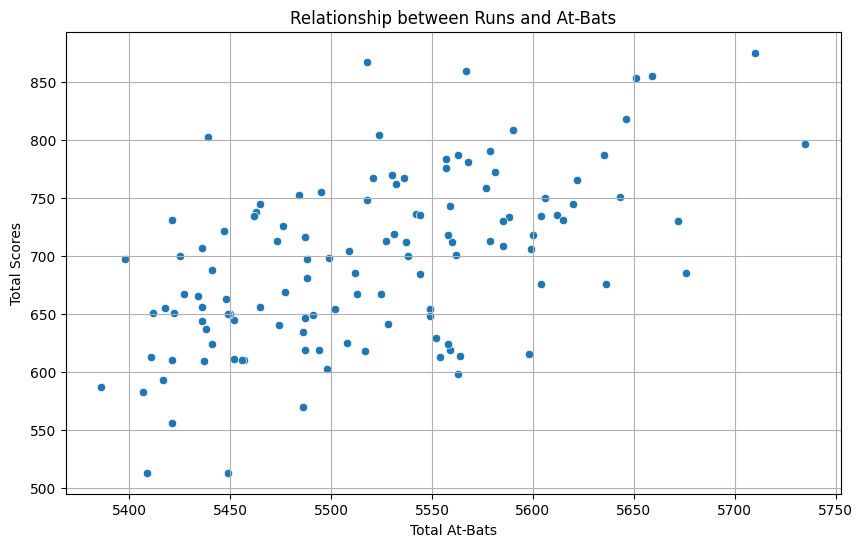

In [15]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='at_bats', y='runs', data=aggregated_df)
plt.xlabel("Total At-Bats")
plt.ylabel("Total Scores")
plt.title("Relationship between Runs and At-Bats")
plt.grid(True)
plt.show()

The relationship does look linear with some definite outliers. If we plot it with a regeression line we can see the linear relationship better:

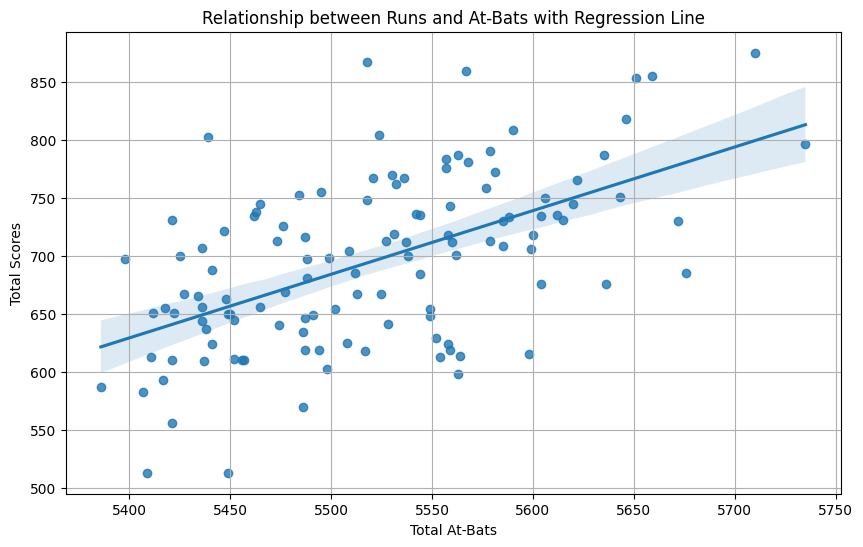

In [17]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='at_bats', y='runs', data=aggregated_df)
plt.xlabel("Total At-Bats")
plt.ylabel("Total Scores")
plt.title("Relationship between Runs and At-Bats with Regression Line")
plt.grid(True)
plt.show()

#### (b) Assessing relationship

If you knew a team’s at bats, would you be comfortable using a linear model to predict the number of
runs? Why or why not? Quantify the strength of the relationship with the correlation coefficient. Discuss what you find.

In [18]:
correlation = aggregated_df['at_bats'].corr(aggregated_df['runs'])
print(f"Correlation coefficient between At-Bats and Runs: {correlation}")

Correlation coefficient between At-Bats and Runs: 0.5592616547648729


The correlation is .5593 which is not very strong. While there is a positive relationship, ie when a team has more at bats, 55.93% of the time they get a higher score, it is not a very strong one. Said another way: there's a noticeable tendency for teams with more at-bats to also score more runs.<p>
This is not enough correlation to predict the number of runs.

#### (c) Modeling

Use the `statsmodels` package to fit a simple linear model for runs as a function of at-bats. Ensure a constant (intercept) has been added to the regression. Write down the formula for the model, filling in estimated coefficient values.

In [21]:
X = sm.add_constant(aggregated_df['at_bats'])

# Define the response variable (runs)
y = aggregated_df['runs']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     53.70
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           3.15e-11
Time:                        14:38:52   Log-Likelihood:                -662.21
No. Observations:                 120   AIC:                             1328.
Df Residuals:                     118   BIC:                             1334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2333.9660    413.345     -5.647      0.0

runs = β₀ + β₁ * at_bats + ε<p>
β₀=Y Intercept (ie the value of y when x is 0); this is the constant coefficient<p>
β₁=The slope (the change in y for a one-unit change in x)<p>
ε=The error or residual<p>
runs=the predicted number of runs given the at bats<p>
at_bats=the given at-bats for the team/game<p>

#### (d) Interpretation

Describe in words the interpretation of $\beta$<sub>1</sub>.

β₁ is the change in runs (score) (y) given an additional (or less) at bat (x)

### Problem 3: Plotting

#### (a) Plot regression line

Make a plot of at-bats vs runs but include the fitted regression line. How well does the fitted line fit the data?

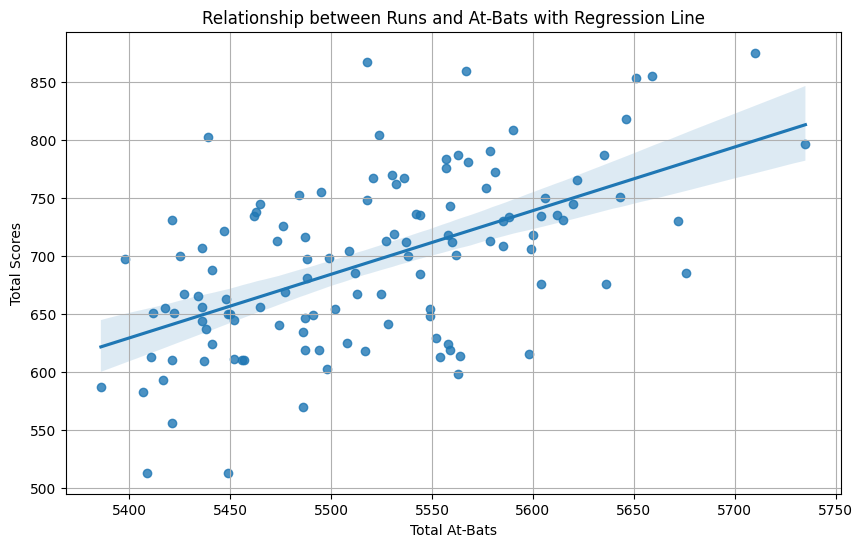

In [22]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='at_bats', y='runs', data=aggregated_df)
plt.xlabel("Total At-Bats")
plt.ylabel("Total Scores")
plt.title("Relationship between Runs and At-Bats with Regression Line")
plt.grid(True)
plt.show()

The regression line fits, but with a lot of residual error

#### (b) Plot residuals

Make a plot of the residuals versus at bats. Is there any apparent pattern in the residuals plot?

In [25]:
# Using the model we created above, get the residuals
residuals = model.resid
residuals

0        3.567720
1       43.798582
2       74.285824
3     -100.648076
4       53.869299
          ...    
115     67.705751
116     -4.868489
117     -0.658526
118      7.680235
119      7.101377
Length: 120, dtype: float64

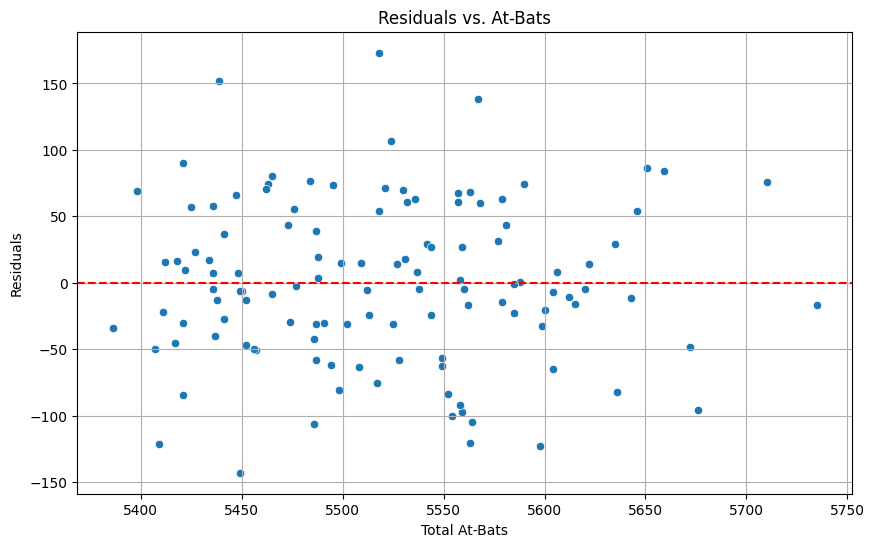

In [26]:
# Create the residuals vs. at-bats plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=aggregated_df['at_bats'], y=residuals)
plt.xlabel("Total At-Bats")
plt.ylabel("Residuals")
plt.title("Residuals vs. At-Bats")
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

The residuals do tend to 0 with more at-bats, but there are still outliers. This indicates a stronger relationship to a higher score at the higher end of the at-bats.